# Ensemble technique

__Data Description__:  

_The data is related with direct marketing campaigns of a
Portuguese banking institution. The marketing campaigns
were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed._

 __Domain : Banking__
 
 
__Context:__

Leveraging customer information is paramount for most
businesses. In the case of a bank, attributes of customers like
the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.

__Attribute Information:__
1. __age__ (numeric)

2. __job__ : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','manage
ment','retired','self-employed','services','student','technicia
n','unemployed','unknown')

3. __marital__ : marital status (categorical:
'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)

4. __education__ (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes
sional.course','university.degree','unknown')

5. __default: has credit in default?__ (categorical:
'no','yes','unknown')

6. __balance__: average yearly balance, in euros (numeric)

7. __housing__: has housing loan? (categorical:
'no','yes','unknown')

8. __loan__: has personal loan? (categorical: 'no','yes','unknown')

9. __contact__: contact communication type (categorical:
'cellular','telephone')

10. __day__: last contact day of the month (numeric 1 -31)

11. __month__: last contact month of year (categorical: 'jan', 'feb',
'mar', ..., 'nov', 'dec')

12. __duration__: last contact duration, in seconds (numeric).
Important note: this attribute highly affects the output
target (e.g., if duration=0 then y='no'). Yet, the duration is
not known before a call is performed. Also, after the end
of the call y is obviously known. Thus, this input should
only be included for benchmark purposes and should be
discarded if the intention is to have a realistic predictive
model.

13. __campaign__: number of contacts performed during this
campaign and for this client (numeric, includes last
contact)

14. __pdays__: number of days that passed by after the client
was last contacted from a previous campaign (numeric;
999 means client was not previously contacted)

15. __previous__: number of contacts performed before this
campaign and for this client (numeric)

16. __poutcome__: outcome of the previous marketing
campaign (categorical: 'failure','nonexistent','success')
17.target: has the client subscribed a term deposit? (binary:
"yes","no")



# Steps

__Exploratory data Analysis__

- Missing values handling

- 5 point summary, calulate IQR

- Detect outliers if any & solve them

- Data distribution identification: Normal/ skewness

- Get correlation values, perform data balancing

__Dta Pre-processing__

- Label encoding.

- change data types if needed

- handle outliers with mean replacements

- pairplot  to know the feature importance

-  Scale the data, standardize it if needed

__Split the data -Train, Test,__


__Model Building__: 

- Logistic regression, 

- Naive Bayes, 

- KNN, 

- SVM

__Ensembel Methods__

- Decision Tree

- Feture importance test for DT

- pruning of DT

- Bagging 

- Adaptive Boosting

- Gradient Boosting

- Random Forest

__Models With accuracy score__


__Conclusion__

- Comments n data set

- Comments on Models

- Miscellaneous comments

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
# import pydotplus
from statistics import median,mean

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score

In [56]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [57]:
data.shape

(45211, 17)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


__10 features are of 'object' type, 7 are integer type__

__As per the given data set, we can say there are 10 category type, so first let us convert them int category__

In [59]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [110]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]= data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [61]:
data.dtypes.to_frame('Datatypes of Attributes').T
# This 'T' here represents transpose which means without this the result would
# have been in rows But here we can see this in one row

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


## Check the Missing values

In [62]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

###  Get all the counts in all categories

In [63]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [64]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [65]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [66]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [67]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [68]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [69]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [70]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [71]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [72]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [73]:
data['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

#### __Five point Summary__ Used only for Numeric values

In [74]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


_'AGE' has Outliers: mean is 40 &SD is 10 so, here
__mean (mu) 40__, __std (sigma) 10__, __min 18__, __max 95__ 
Therefore __mu - sigma__ = 30 & __mu + sigma__= 50 (68% of data)
__mu - 2*sigma__ = 20 & __mu + 2*sigma__= 60 (95% of data)
__mu - 3*sigma__ = 10 & __mu + 3*sigma__= 70 (99.99 % of data)

- Therfore we can observe here that min is __18__ & max is __95__ which is less than our accepter range __(20-50)__ therefore 'age' has outliers. Similarly check for others 


- __IQR__: Find range, this gives precise 


- Similarly __balance, duration, campaign, plays, previous__ has outliers


### Distribution of Numerical columns 

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


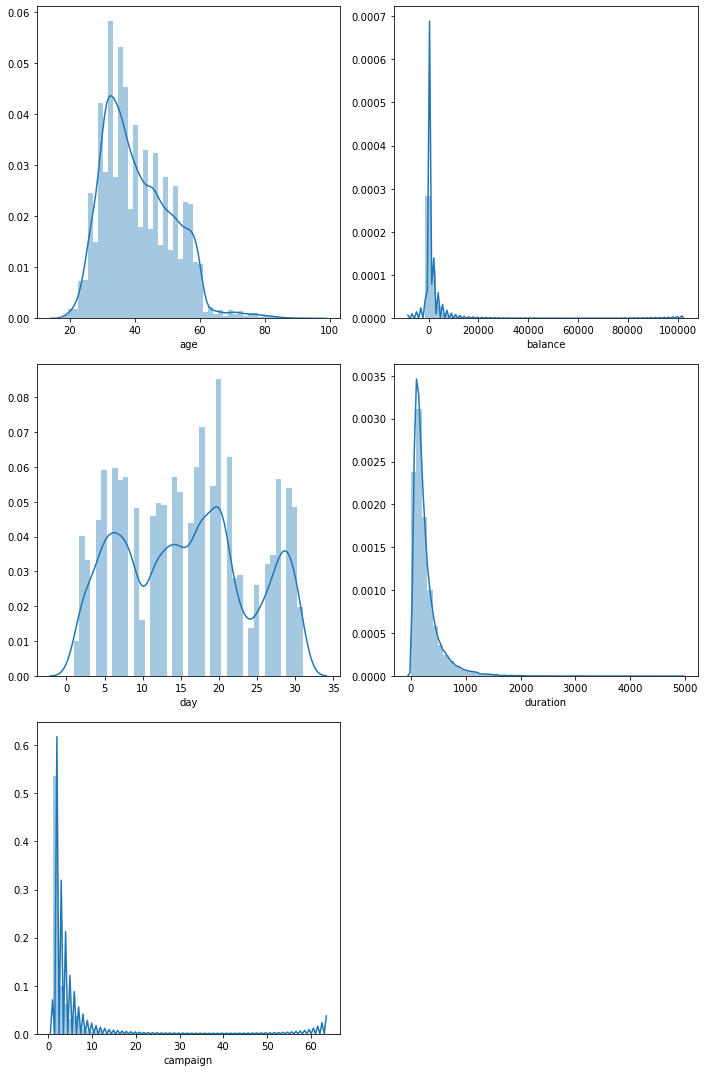

In [75]:
fig, axe=plt.subplots(nrows=3, ncols=2,figsize=(10,15))
axe = axe.flatten()
sns.distplot(data['age'], ax=axe[0])
sns.distplot(data['balance'], ax=axe[1])
sns.distplot(data['day'], ax=axe[2])
sns.distplot(data['duration'], ax=axe[3])
sns.distplot(data['campaign'], ax=axe[4])
# sns.distplot(data['pdays'], ax=axe[5])
# sns.distplot(data['previous'], ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

## Distribution of categorical features

Usually we go for scater plot, count plot etc.

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


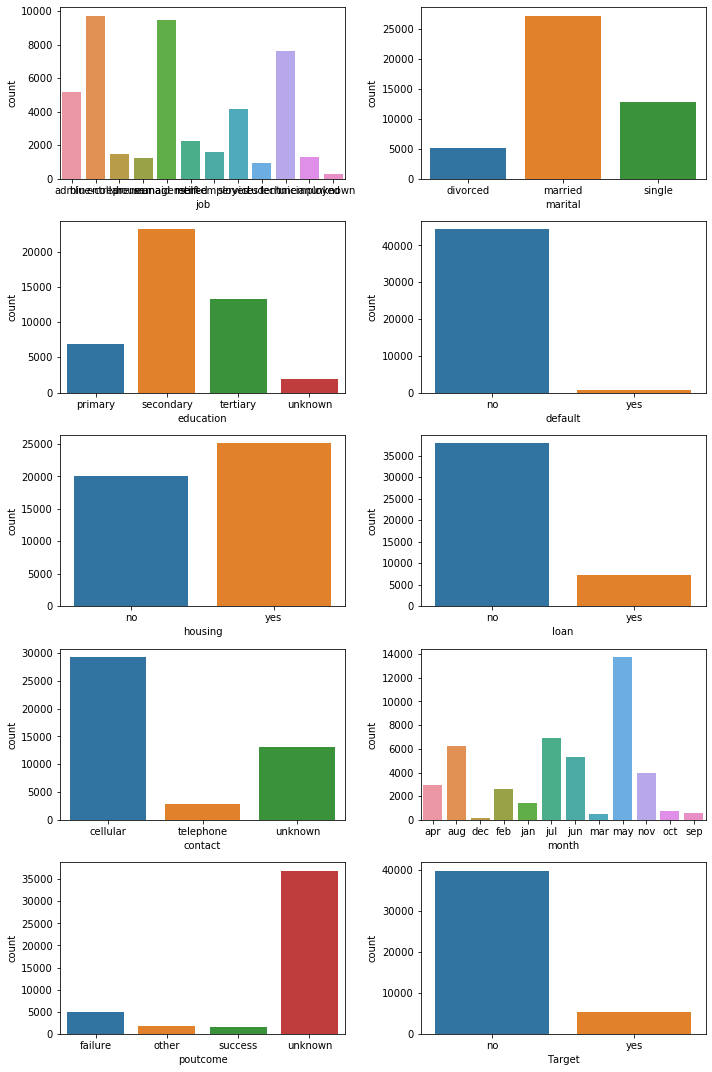

In [76]:
fig, axe=plt.subplots(nrows=5, ncols=2,figsize=(10,15))
axe = axe.flatten()
plot = sns.countplot(x=data['job'], data=data, ax=axe[0])

sns.countplot(x=data['marital'], data=data, ax=axe[1])
sns.countplot(x=data['education'], data=data, ax=axe[2])
sns.countplot(x=data['default'], data=data, ax=axe[3])
sns.countplot(x=data['housing'], data=data, ax=axe[4])
sns.countplot(x=data['loan'], data=data, ax=axe[5])
sns.countplot(x=data['contact'], data=data, ax=axe[6])
sns.countplot(x=data['month'], data=data, ax=axe[7])
sns.countplot(x=data['poutcome'], data=data, ax=axe[8])
sns.countplot(x=data['Target'], data=data, ax=axe[9])  
#Since beyond 8 is not permissible in the graphs, lets plot next

fig.tight_layout()
fig.show()

Inference from the graphs

more than 90% has __No - default__

more than 98% ha __NOt Subscribed__

Most customer has been contacted in __May__

Most of the customers havve been contacted by a __Cellularphone__

Number of customers having __Housing loan__ is more than __No housing loan__

Roughly 6% have credit in __default__

## Measure of skewness

In [77]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


## check the presence of Outliers 
Only for Numerical Features

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


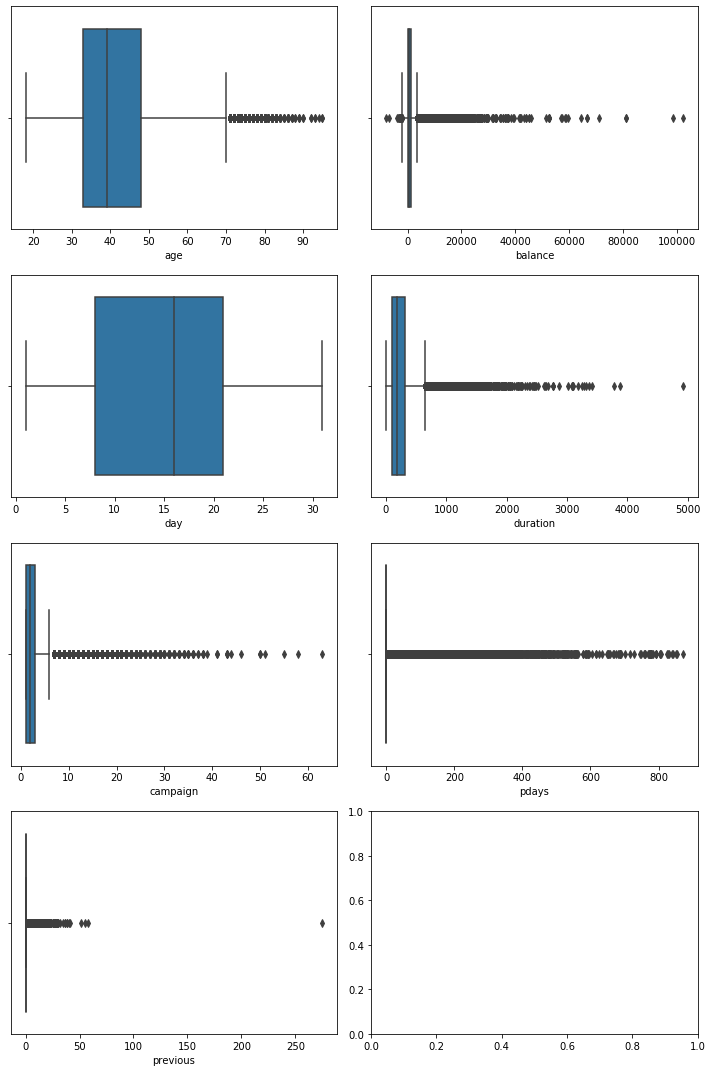

In [78]:
fig, axe=plt.subplots(nrows=4, ncols=2,figsize=(10,15))
axe = axe.flatten()


sns.boxplot(x='age', data=data, ax=axe[0])
sns.boxplot(x='balance', data=data, ax=axe[1])
sns.boxplot(x='day', data=data, ax=axe[2])
sns.boxplot(x='duration', data=data, ax=axe[3])
sns.boxplot(x='campaign', data=data, ax=axe[4])
sns.boxplot(x='pdays', data=data, ax=axe[5])
sns.boxplot(x='previous', data=data, ax=axe[6])


fig.tight_layout()
fig.show()

__Except 'day' all have many Outliers__

In [79]:
data['Target'].value_counts().to_frame('Target feature distribution')

,Target feature distribution
no,39922
yes,5289


## Encoding numerical features 


In [80]:
data.dtypes.to_frame('Datatypes of Attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of Attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [81]:
df=data.copy()
encoder = LabelEncoder()

df['default']=encoder.fit_transform(df['default']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)

df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,1,2,1,1,2
education,2,1,1,3,3
default,0,0,0,0,0
balance,2143,29,2,1506,1
housing,1,1,1,1,0
loan,0,0,1,0,0
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [82]:
df.info() #here all converted to integers apart from job & contact

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


Again converting to categorical 

In [83]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]= df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


All are converted to number based category

## Handling Outliers with mean replacement

In [85]:
meanbal=float(df['balance'].mean())
df['balance']=np.where(df['balance']>np.percentile(df['balance'],75),meanbal, df['balance'])


In [86]:
meandur=float(df['duration'].mean())
df['duration']=np.where(df['duration']>np.percentile(df['duration'],75),meandur, df['duration'])

In [87]:
meancam=float(df['campaign'].mean())
df['campaign']=np.where(df['campaign']>np.percentile(df['campaign'],75),meancam, df['campaign'])

In [88]:
meanpd=float(df['pdays'].mean())
df['pdays']=np.where(df['pdays']>np.percentile(df['pdays'],75),meanpd, df['pdays'])

In [89]:
meanpr=float(df['previous'].mean())
df['previous']=np.where(df['previous']>np.percentile(df['previous'],75),meanpr, df['previous'])

### After removing the outliers plot the boxplot

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


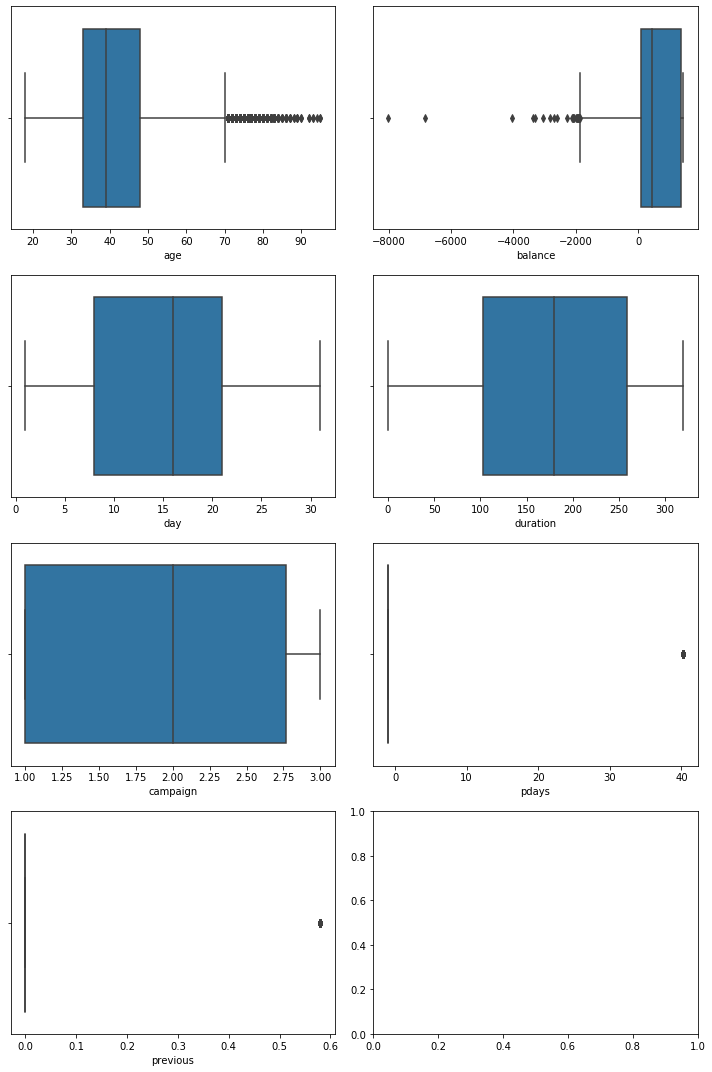

In [90]:
fig, axe=plt.subplots(nrows=4, ncols=2,figsize=(10,15))
axe = axe.flatten()


sns.boxplot(x='age', data=df, ax=axe[0])
sns.boxplot(x='balance', data=df, ax=axe[1])
sns.boxplot(x='day', data=df, ax=axe[2])
sns.boxplot(x='duration', data=df, ax=axe[3])
sns.boxplot(x='campaign', data=df, ax=axe[4])
sns.boxplot(x='pdays', data=df, ax=axe[5])
sns.boxplot(x='previous', data=df, ax=axe[6])


fig.tight_layout()
fig.show()

We can observe here that the outliers are removed after replacing it with the mean

### Plotting the correlation plot 

after removing the outliers

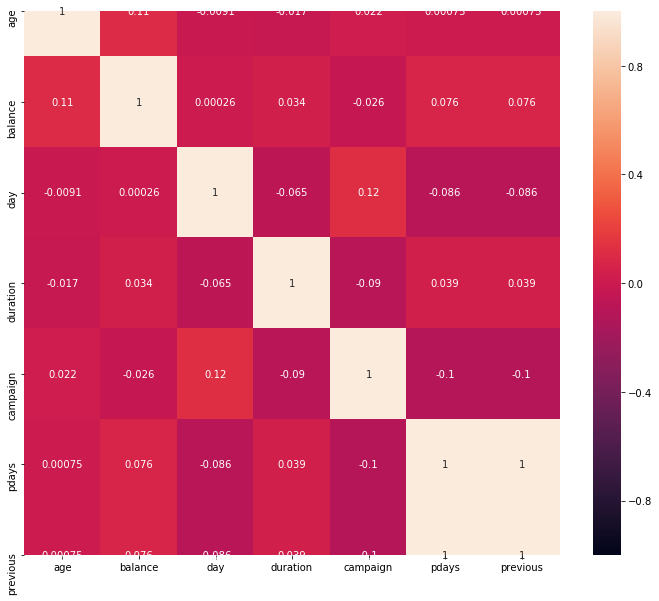

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, vmax=1, vmin=-1) # range of values between -1 to 1

For dataframe before removing the outliers

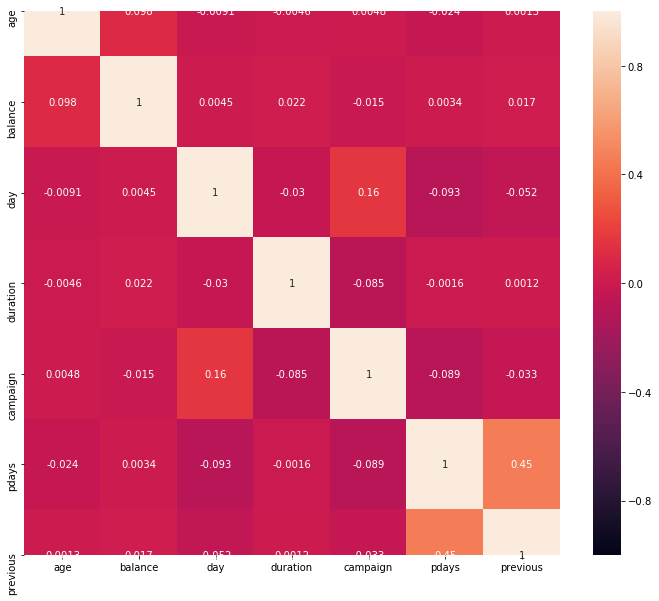

In [92]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, vmax=1, vmin=-1) # range of values between -1 to 1

In [93]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0


In [94]:
df['education'].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

Removing few features wrt time 

In [95]:
df2 = df.drop(['job','education','contact','month','duration','pdays','day','month'], axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


### Pairplot features

Multivariate Analysis

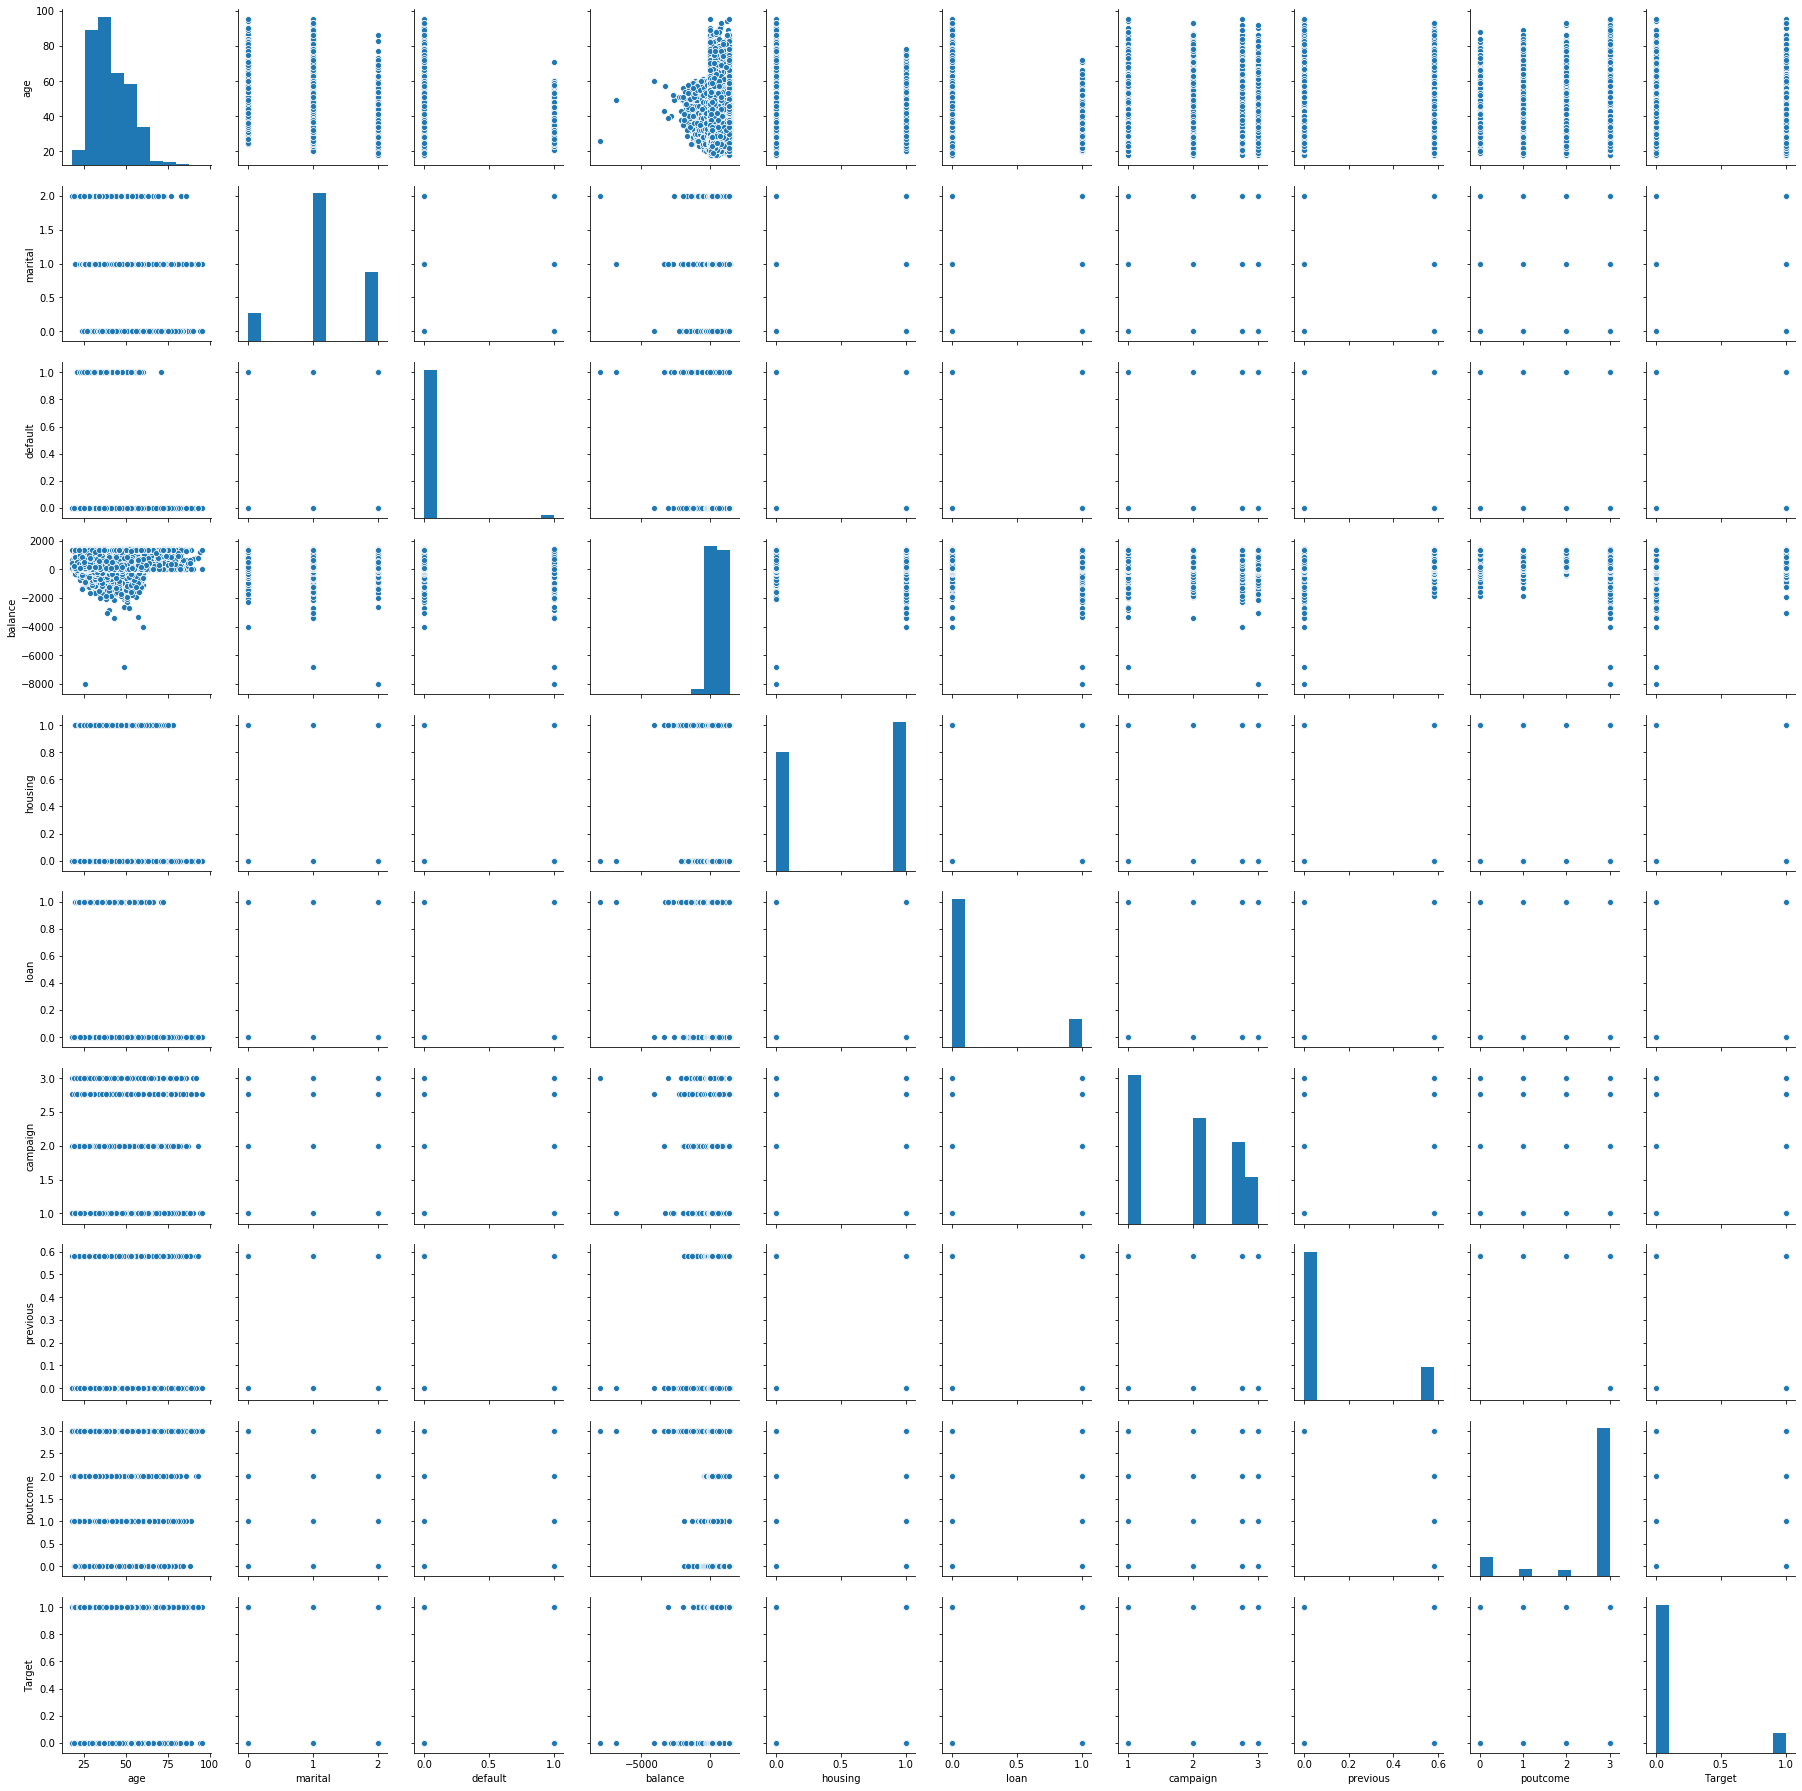

In [96]:
sns.pairplot(df2)

## Splitting  the data set
70 / 30 

In [97]:
x=df2.drop('Target',axis=1)
y=df2['Target']

In [98]:
x.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome
0,58,1,0,1362.272058,1,0,1.0,0.0,3
1,44,2,0,29.000000,1,0,1.0,0.0,3
2,33,1,0,2.000000,1,1,1.0,0.0,3
3,47,1,0,1362.272058,1,0,1.0,0.0,3
4,33,2,0,1.000000,0,0,1.0,0.0,3


In [99]:
y.head(2)

0    0
1    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3,random_state=2)

### Scaling the data
Only done for the indeppendent features not for the dependent features (Output)

In [101]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled= scaler.fit_transform(xtest)

# Models

## Logistic Regression

In [102]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(xtrain_scaled, ytrain)
y_pred=logic_r.predict(xtest_scaled)
LR_accuracy = accuracy_score(ytest, y_pred)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,y_pred))
print('\n Accuracy Score\n', LR_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,y_pred))


Confusion Matrix 

 [[11892   107]
 [ 1318   247]]

 Accuracy Score
 89.49424948392804
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



## Naive Bayes 

In [103]:
NB = GaussianNB()
NB.fit(xtrain_scaled, ytrain)
y_predi = NB.predict(xtest_scaled)
NB_accuracy=accuracy_score(ytest, y_predi)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,y_pred))
print('\n Accuracy Score\n', NB_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,y_pred))


Confusion Matrix 

 [[11892   107]
 [ 1318   247]]

 Accuracy Score
 82.40194632851666
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



## KNN model

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_scaled, ytrain)
y_predict=knn.predict(xtest_scaled)

KNN_accuracy=accuracy_score(ytest, y_predict)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,y_predict))
print('\n Accuracy Score\n', KNN_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,y_predict))


Confusion Matrix 

 [[11465   534]
 [ 1236   329]]

 Accuracy Score
 86.95075199056326
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.38      0.21      0.27      1565

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



## SVC Model

In [105]:
svc=SVC()
svc.fit(xtrain_scaled, ytrain)
y_pred1=svc.predict(xtest_scaled)

SVC_accuracy=accuracy_score(ytest, y_pred1)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,y_pred1))
print('\n Accuracy Score\n', SVC_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,y_pred1))


Confusion Matrix 

 [[11856   143]
 [ 1287   278]]

 Accuracy Score
 89.45738720141551
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



## Decision Tree

In [111]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(xtrain_scaled,ytrain)
dt_pred=dtree.predict(xtest_scaled)

DT_accuracy=accuracy_score(ytest, dt_pred)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,dt_pred))
print('\n Accuracy Score\n', DT_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,dt_pred))


Confusion Matrix 

 [[10819  1180]
 [ 1190   375]]

 Accuracy Score
 82.52727808905928
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.82      0.83      0.83     13564



## Feature importance test for DT

In [107]:
# xvar = df2.drop('Target',axis=1)
# feature_cols=xvar.columns
# feat_importance=dtree.compute_feature_importance_(normalize=False)
# feat_imp_dict=dict(zip(feature))

## Bagging:


In [116]:
# from sklearn import BaggingClassifier
bagc=BaggingClassifier(base_estimator = dtree,n_estimators=500, random_state=3)
bagc.fit(xtrain_scaled,ytrain)
bag_pred = bagc.predict(xtest_scaled)

BAG_accuracy=accuracy_score(ytest, bag_pred)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,bag_pred))
print('\n Accuracy Score\n', BAG_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,bag_pred))


Confusion Matrix 

 [[11554   445]
 [ 1230   335]]

 Accuracy Score
 87.65113535830139
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Adaptive Boosting Ensemble

In [121]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1)
adab.fit(xtrain_scaled, ytrain) #here xtrain was used ?
ada_pred=adab.predict(xtest)

ADA_accuracy=accuracy_score(ytest, ada_pred)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,ada_pred))
print('\n Accuracy Score\n', ADA_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,bag_pred))


Confusion Matrix 

 [[11999     0]
 [ 1565     0]]

 Accuracy Score
 88.46210557357712
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
randf1 = RandomForestClassifier(n_estimators=100, random_state=2, max_features=3)
randf1.fit(xtrain_scaled, ytrain) 
ran_pred1 = randf1.predict(xtest)

RAF1_accuracy=accuracy_score(ytest, ran_pred1)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,ran_pred1))
print('\n Accuracy Score\n', RAF1_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,ran_pred1))


Confusion Matrix 

 [[6292 5707]
 [ 819  746]]

 Accuracy Score
 51.8873488646417
\Classification Report

               precision    recall  f1-score   support

           0       0.88      0.52      0.66     11999
           1       0.12      0.48      0.19      1565

    accuracy                           0.52     13564
   macro avg       0.50      0.50      0.42     13564
weighted avg       0.80      0.52      0.60     13564



### This model is with using        _xtrain & not _xtrain_scaled_

In [130]:
randf = RandomForestClassifier(n_estimators=100, random_state=2, max_features=3)
randf.fit(xtrain, ytrain)  # Here xtrain is used note the difference in the accuracy 
ran_pred = randf.predict(xtest)

RAF_accuracy=accuracy_score(ytest, ran_pred)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,ran_pred))
print('\n Accuracy Score\n', RAF_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,ran_pred))


Confusion Matrix 

 [[11536   463]
 [ 1226   339]]

 Accuracy Score
 87.5479209672663
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.22      0.29      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [139]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=2)
grad.fit(xtrain, ytrain)  #Here too xtrain used
gra_pred = grad.predict(xtest) 

GRA_accuracy=accuracy_score(ytest, gra_pred)
print('\nConfusion Matrix \n\n', confusion_matrix(ytest,gra_pred))
print('\n Accuracy Score\n', GRA_accuracy*100)
print('\Classification Report\n\n', classification_report(ytest,gra_pred))


Confusion Matrix 

 [[11900    99]
 [ 1328   237]]

 Accuracy Score
 89.47950457092303
\Classification Report

               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.71      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Model Accuracy with Scores

In [137]:
scores=[('Naive bayes',NB_accuracy),
       ('KNN', KNN_accuracy),
       ('Logistic regression',LR_accuracy),
       ('SVC',SVC_accuracy),
       ('Decision Tree', DT_accuracy),
       ('Bagging', BAG_accuracy),
       ('Adaptive Boosting',ADA_accuracy),
       ('Gradient Boosting', GRA_accuracy),
       ('Random Forest', RAF_accuracy)]

scores =pd.DataFrame(scores,columns=['Model', 'Accuracy Score'])

print('\033[lm'' Current scores with outliers replaced with mean:]')

scores.sort_values(by ='Accuracy Score', ascending=False)

m Current scores with outliers replaced with mean:]


,Model,Accuracy Score
2,Logistic regression,0.894942
7,Gradient Boosting,0.894795
3,SVC,0.894574
6,Adaptive Boosting,0.884621
5,Bagging,0.876511
8,Random Forest,0.875479
1,KNN,0.869508
4,Decision Tree,0.825273
0,Naive bayes,0.824019


# Observations made from above methods


___Whenever a binary classification is given, using a Logistic Regression algorithm gives better output than other Ensemble technique___

- Well predicted the class 0


- NOt well in class 1 since the recall & precision is not so good due to the less availibility of class 1 records (Due to __Class Imbalance__)


- Data sets included many unwanted features/attributes


- __SVC__ outperformed __Naive Bayes__ due to its ability of creating __multiple Hyperplanes__


- After removing the duration column the highest model score dropped by __2%__


- Outliers didn't much affect the results


- DT & GBM performed better for this data sets


- After getdummies the features will increase, it won't make significant difference.


- Outlier handling didn't make significant difference in results


